In [1]:
import pandas as pd
import torch
import clip
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from utils import image_to_embeddings,image_matching

In [5]:
file_path = '/Users/kabir/FRE-7773-Project/data/clean_data/room_products.csv'  
data = pd.read_csv(file_path)
data.head()

Unnamed: 0                                               Room  \
0           0  images/room_scenes/ikea-a-colourful-room-for-k...   
1           1  images/room_scenes/ikea-artist-studio-by-day-c...   
2           2  images/room_scenes/ikea-artist-studio-by-day-c...   
3           3  images/room_scenes/ikea-a-colourful-room-for-k...   
4           4  images/room_scenes/ikea-big-world-small-scale_...   

                        Item  Product ID  
0      images/500.210.76.jpg  500.210.76  
1      images/500.210.76.jpg  500.210.76  
2      images/500.210.76.jpg  500.210.76  
3  images/bed/802.538.09.jpg  802.538.09  
4  images/bed/802.538.09.jpg  802.538.09

In [6]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

Room  \
0  images/room_scenes/ikea-a-colourful-room-for-k...   
1  images/room_scenes/ikea-artist-studio-by-day-c...   
2  images/room_scenes/ikea-artist-studio-by-day-c...   
3  images/room_scenes/ikea-a-colourful-room-for-k...   
4  images/room_scenes/ikea-big-world-small-scale_...   

                        Item  Product ID  
0      images/500.210.76.jpg  500.210.76  
1      images/500.210.76.jpg  500.210.76  
2      images/500.210.76.jpg  500.210.76  
3  images/bed/802.538.09.jpg  802.538.09  
4  images/bed/802.538.09.jpg  802.538.09

In [7]:
len(data)

6038

In [8]:
import os
import pandas as pd

# Assuming 'df' is your DataFrame and it has a column 'room' with image paths
# Replace this with your actual DataFrame loading method if needed
# df = pd.read_csv('your_dataframe.csv') or any other method to load your DataFrame

# Function to check if the image file exists
def image_exists(row, base_path='/Users/kabir/FRE-7773-Project/data/'):
    image_path = os.path.join(base_path, row['Room'])
    return os.path.exists(image_path)

# Apply the function to each row and keep only rows where the image exists
df = data[data.apply(image_exists, axis=1)]

# Now df contains only rows where the corresponding image exists
print("DataFrame after removing rows with non-existing images:")
len(df)


DataFrame after removing rows with non-existing images:


2673

In [9]:
# Function to process descriptions in batches and generate embeddings

def process_in_batches(function, data, batch_size=128):
    embeddings = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        batch_embeddings = function(batch)
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

# Extract descriptions from the DataFrame
room = df['Room'].tolist()
for i in range(len(room)):
    room[i]='/Users/kabir/FRE-7773-Project/data/'+room[i]
# Generate embeddings in batches
room_embeddings = process_in_batches(image_to_embeddings, room)

# Add embeddings to the DataFrame
df['image_embeddings'] = list(room_embeddings)

# Display the DataFrame to verify
df.head()



/var/folders/8f/ydfzy_2j73n93khd4xqvwmzh0000gn/T/ipykernel_4202/3760605507.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_embeddings'] = list(room_embeddings)


Room  \
1  images/room_scenes/ikea-artist-studio-by-day-c...   
4  images/room_scenes/ikea-big-world-small-scale_...   
5  images/room_scenes/ikea-make-room-for-sleep-an...   
6  images/room_scenes/ikea-room-to-draw-play-and-...   
7  images/room_scenes/ikea-snuggle-down-low-or-sl...   

                        Item  Product ID  \
1      images/500.210.76.jpg  500.210.76   
4  images/bed/802.538.09.jpg  802.538.09   
5  images/bed/802.538.09.jpg  802.538.09   
6  images/bed/802.538.09.jpg  802.538.09   
7  images/bed/802.538.09.jpg  802.538.09   

                                    image_embeddings  
1  [-0.55207556, 0.12926051, 0.31903654, -0.03072...  
4  [-0.40627012, 0.24077126, 0.1964512, 0.4244185...  
5  [-0.61236405, 0.36940438, 0.28108978, 0.376238...  
6  [-0.3324056, 0.1468462, 0.28149498, 0.25650764...  
7  [-0.6243174, 0.49681166, 0.25884485, 0.2185691...

In [10]:
len(df)

2673

In [12]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace this with your actual DataFrame if it's named differently
# df = pd.read_csv('your_dataframe.csv') or any other method to load your DataFrame

# Check for duplicated descriptions
duplicated_descriptions = df[df.duplicated('Room', keep=False)]

# Count of duplicated descriptions
duplicated_count = duplicated_descriptions.shape[0]

print(f"Number of duplicated descriptions: {duplicated_count}")
print("Duplicated descriptions:")


Number of duplicated descriptions: 2673
Duplicated descriptions:


In [3]:
df12=pd.read_pickle("/Users/kabir/FRE-7773-Project/data/clean_data/room_embeddings.pkl")
#df12.head()
type(df12['image_embeddings'][1])

numpy.ndarray

In [4]:
df12['Room'][1]

'ikea-artist-studio-by-day-cosy-cocoon-by-night__1364319298429-s4.jpg'

In [7]:
df12 = df12.drop_duplicates(subset='Room', keep='first')


In [10]:
df12.to_pickle('/Users/kabir/FRE-7773-Project/data/clean_data/room_embeddings.pkl')

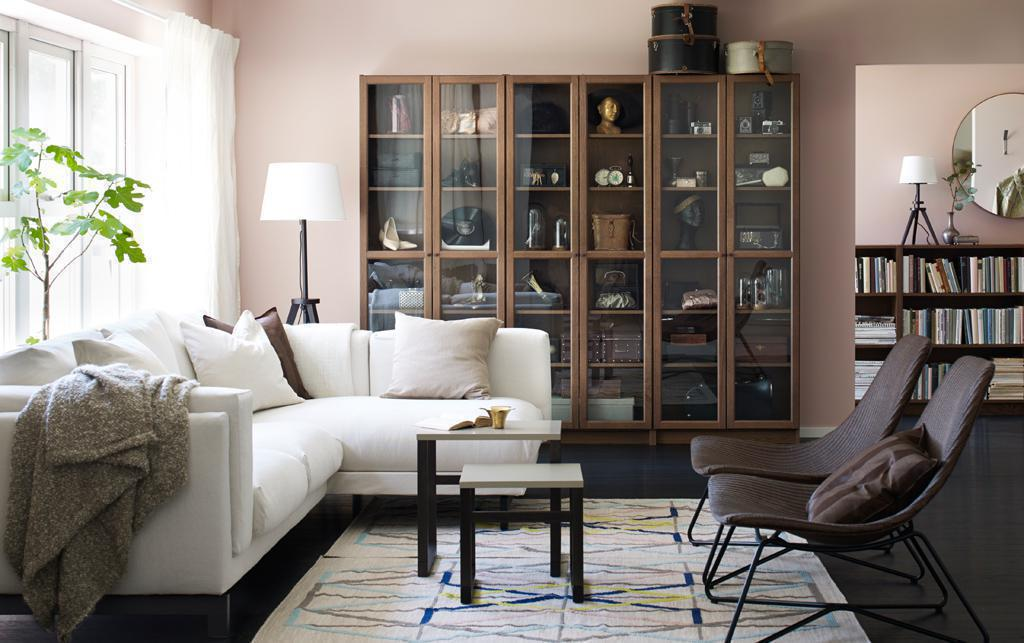

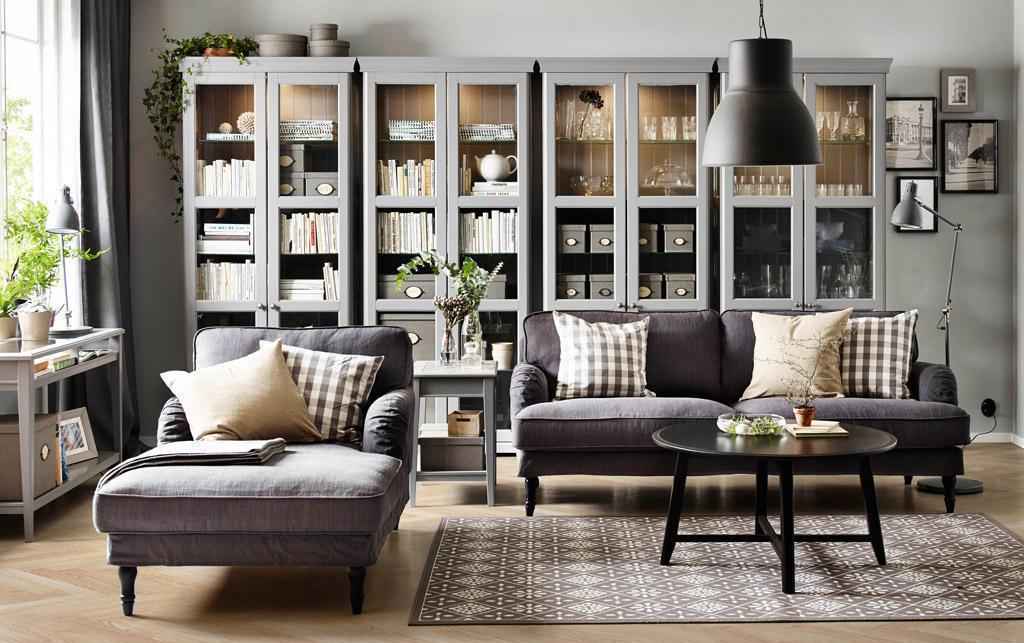

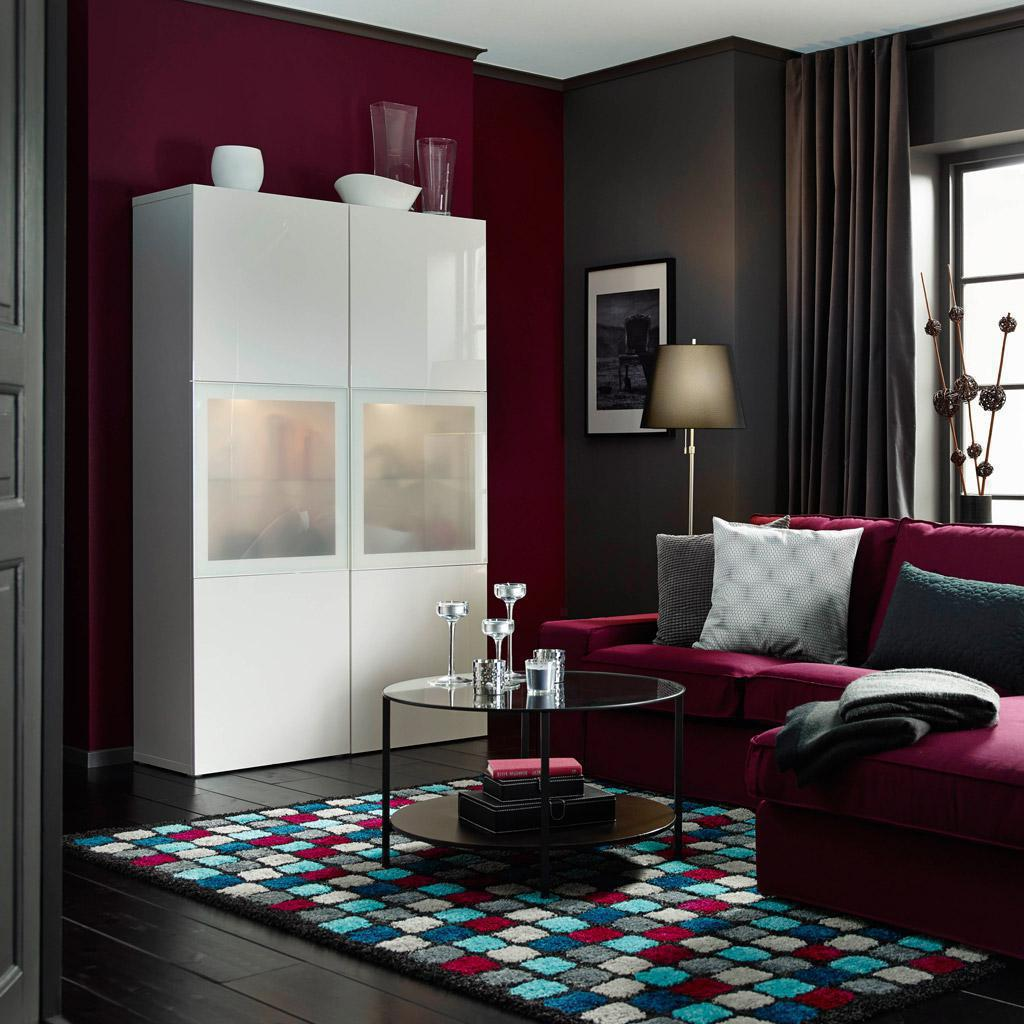

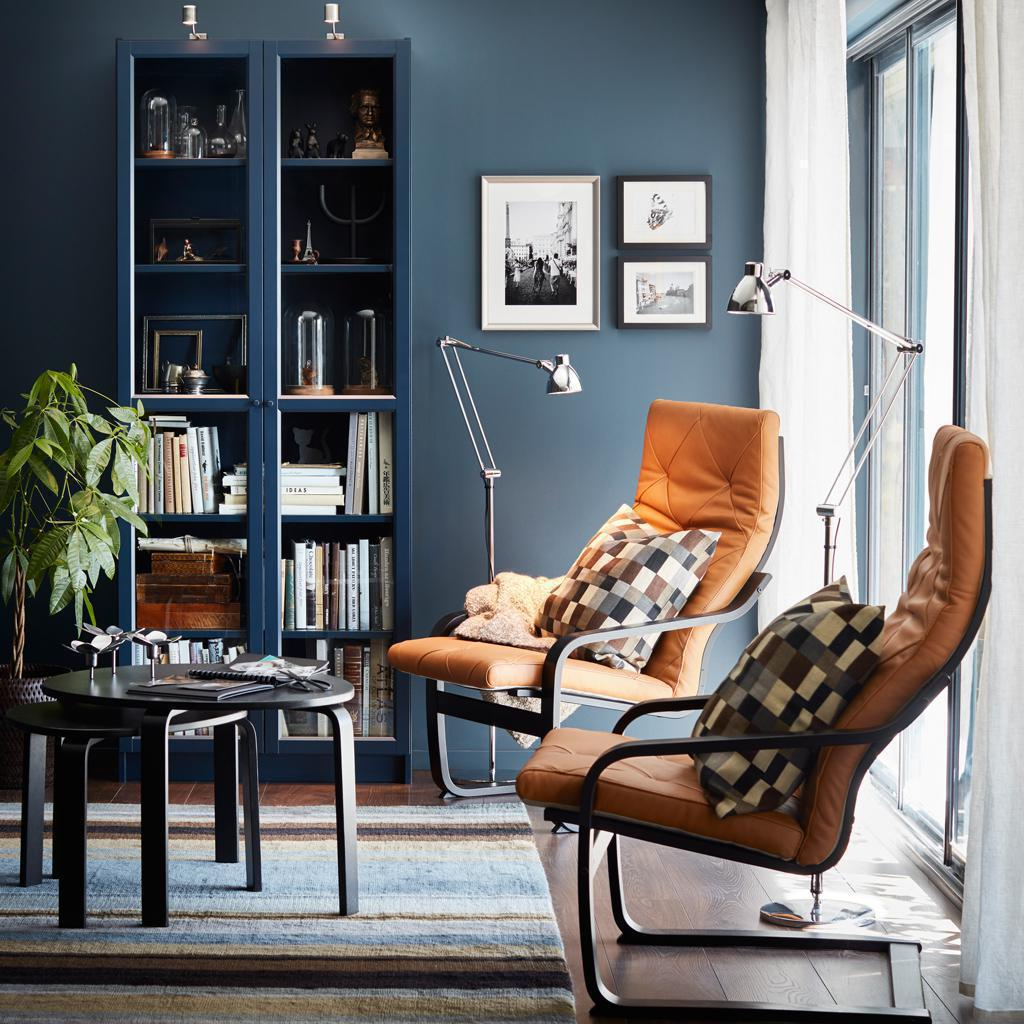

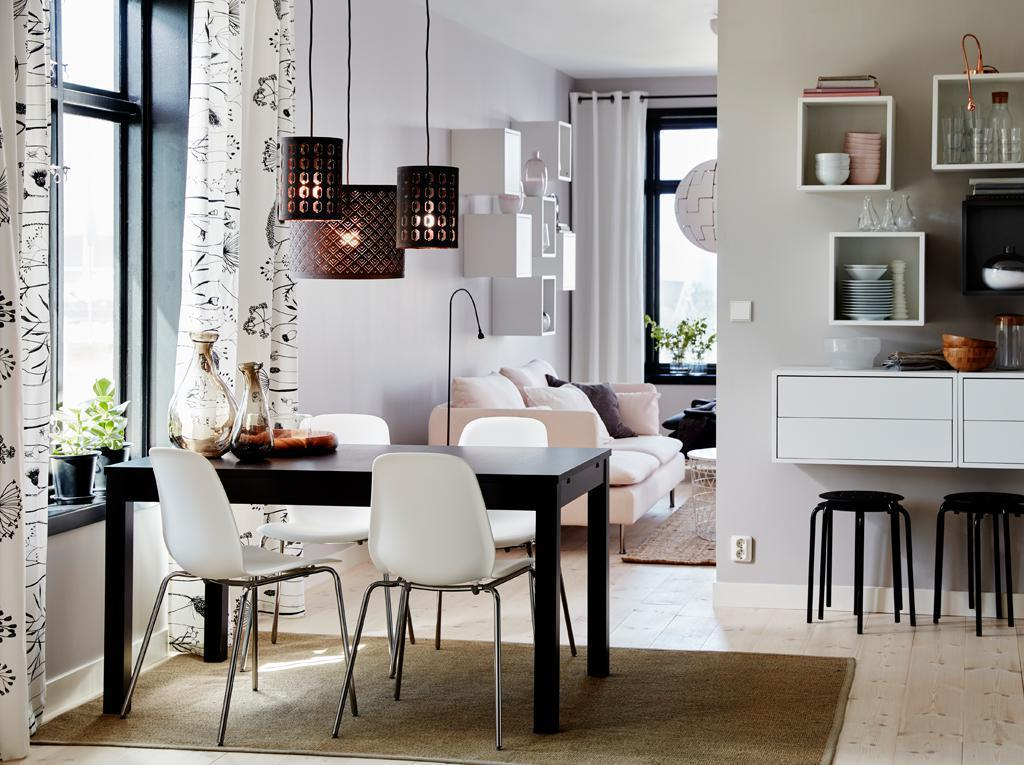

Most Similar Room:                                                    Room  \
2134  ikea-display-all-your-memorabilia-and-more__13...   
2296  ikea-find-your-living-room-design-inspiration_...   
2438  ikea-sleek-storage-for-your-favourite-things__...   
2334      ikea-not-just-for-books__1364315972080-s4.jpg   
977   ikea-breakfast-for-four-dinner-for-six__136431...   

                             Item  Product ID  \
2134  images/chair/502.954.72.jpg  502.954.72   
2296        images/102.864.60.jpg  102.864.60   
2438        images/902.461.54.jpg  902.461.54   
2334        images/302.604.02.jpg  302.604.02   
977         images/602.811.44.jpg  602.811.44   

                                       image_embeddings  
2134  [-0.28905398, 0.35807255, 0.38035798, -0.01048...  
2296  [-0.06684716, 0.058013678, 0.33917445, 0.02083...  
2438  [0.08700775, 0.2955048, 0.052788228, -0.247494...  
2334  [0.06522193, 0.32249218, 0.2781384, -0.0459885...  
977   [-0.23076694, 0.2335403, 0.16202046

In [14]:
input_image = ['/Users/kabir/FRE-7773-Project/data/tmp/living2.jpg']
data_file='/Users/kabir/FRE-7773-Project/data/clean_data/room_embeddings.pkl'
similar_room, time_taken = image_matching(input_image, data_file)
print("Most Similar Room:", similar_room)
print("Time Taken:", time_taken, "seconds")